In [4]:
library(DESeq2)
library(RColorBrewer)
library(tximport)
library(lattice)
library(dplyr)
library(ggplot2)
library(tidyr)

In [5]:
source('~/Documents/UCDavis/Whitehead/RNAseq_15killifish/scripts/plotPCAWithSampleNames.R')
source('~/Documents/UCDavis/Whitehead/RNAseq_15killifish/scripts/overLapper_original.R')

In [6]:
# This is the one with just counts
counts <- read.csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_16October2018.csv",stringsAsFactors = FALSE)

In [7]:
# This is just the counts with Experimental Design Info in the last 4 rows
counts2 <-read.csv("~/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_16October2018_designfactors.csv",stringsAsFactors = FALSE)

In [8]:
dim(counts)

[1] 27775   133

In [9]:
dim(counts2)

[1] 27780   133

In [10]:
head(counts)

X,NCBIproteinID,NCBIscaffold,product,gene,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,⋯,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
0,XP_012704699.1,NW_012224512.1,biogenesis of lysosome-related organelles complex 1 subunit 1,bloc1s1,93.0000,116.0000,122.0000,153.0000,179.0000,⋯,236.0000,250.0000,114.999999,132.00000,130.00000,205.0000,115.000000,148.0000,711.00000,353.000
1,XP_012704700.1,NW_012224512.1,beta-1%2C3-galactosyl-O-glycosyl-glycoprotein beta-1%2C6-N-acetylglucosaminyltransferase 7 isoform X1,gcnt7,200.0000,311.0000,246.0000,309.0000,540.0000,⋯,246.0000,199.0000,382.548968,346.57043,363.06011,440.0000,341.735713,341.1965,935.23792,965.061
2,XP_012704702.1,NW_012224512.1,protein RTF2 homolog,rtfdc1,305.0000,390.0000,327.0000,518.0000,737.0978,⋯,576.3869,540.4908,7.451033,10.42957,2.93989,0.0000,7.438759,10.8035,3.76208,34.939
3,XP_012704703.1,NW_012224512.1,transcription factor AP-2 gamma isoform X1,tfap2c,322.6781,470.4455,459.5337,487.3329,513.9708,⋯,0.0000,0.0000,337.299851,318.60938,318.00000,247.1122,398.828367,343.8689,1189.88472,1367.180
4,XP_012704709.1,NW_012224513.1,ferrochelatase%2C mitochondrial,fech,275.0000,402.0000,246.0000,446.0000,710.0000,⋯,120.0000,106.0000,453.000000,513.00000,400.00000,333.0000,482.000000,335.0000,1324.00000,1144.000
5,XP_012704710.1,NW_012224513.1,WD repeat-containing protein 7,wdr7,155.5490,175.4428,148.0000,142.0000,183.7132,⋯,195.0000,233.0000,311.000000,300.00000,313.00000,194.0000,338.000000,351.0000,686.00000,1098.059


In [12]:
tail(counts2)

,X,NCBIproteinID,NCBIscaffold,product,gene,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,⋯,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
27775,27774,XP_012737896.1,NW_012234565.1,hepatocyte nuclear factor 4-beta-like isoform X4,LOC105940013,0,0,0,0,0,⋯,0,0,9,4,8,3,2,0,37,7
27776,0,Empty,Empty,Empty,Empty,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,⋯,F_notti,F_notti,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis
27777,0,Empty,Empty,Empty,Empty,BW,BW,BW,BW,BW,⋯,FW,FW,BW,BW,BW,BW,BW,BW,BW,BW
27778,0,Empty,Empty,Empty,Empty,Clade1,Clade1,Clade1,Clade1,Clade1,⋯,Clade3,Clade3,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2
27779,0,Empty,Empty,Empty,Empty,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,⋯,FW_Clade3,FW_Clade3,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2
27780,0,Empty,Empty,Empty,Empty,15_ppt,15_ppt,0.2_ppt,0.2_ppt,transfer,⋯,0.2_ppt,0.2_ppt,15_ppt,15_ppt,15_ppt,0.2_ppt,0.2_ppt,0.2_ppt,transfer,transfer


In [14]:
design <- counts2[counts2$NCBIproteinID == 'Empty',]
head(design)
dim(design)

,X,NCBIproteinID,NCBIscaffold,product,gene,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,⋯,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
27776,0,Empty,Empty,Empty,Empty,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,⋯,F_notti,F_notti,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis
27777,0,Empty,Empty,Empty,Empty,BW,BW,BW,BW,BW,⋯,FW,FW,BW,BW,BW,BW,BW,BW,BW,BW
27778,0,Empty,Empty,Empty,Empty,Clade1,Clade1,Clade1,Clade1,Clade1,⋯,Clade3,Clade3,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2,Clade2
27779,0,Empty,Empty,Empty,Empty,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,BW_Clade1,⋯,FW_Clade3,FW_Clade3,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2,BW_Clade2
27780,0,Empty,Empty,Empty,Empty,15_ppt,15_ppt,0.2_ppt,0.2_ppt,transfer,⋯,0.2_ppt,0.2_ppt,15_ppt,15_ppt,15_ppt,0.2_ppt,0.2_ppt,0.2_ppt,transfer,transfer


[1]   5 133

In [15]:
design$type <- c("species","native_salinity","clade","group","condition")

In [16]:
#remove transfer treatment

transfer_samples<-design[design$type=="condition",]
transfer_samples<-transfer_samples[, transfer_samples[1, ] == c("transfer")]
transfer_samples<-colnames(transfer_samples)
BW_FW_counts<-counts[, -which(colnames(counts) %in% transfer_samples)]
dim(BW_FW_counts)
rows<-counts$NCBIproteinID
rownames(BW_FW_counts)<-rows
proteinID <- BW_FW_counts$NCBIproteinID
BW_FW_counts<-BW_FW_counts[ -c(1,2,3,4,5) ]
dim(BW_FW_counts)

[1] 27775    95

[1] 27775    90

In [17]:
# design cateogories (full)
sp<-as.character(unlist(design[1,]))
sp<-sp[-c(1,2,3,4,5)]
sp<-sp[-129]
ph<-as.character(unlist(design[2,]))
ph<-ph[-c(1,2,3,4,5)]
ph<-ph[-129]
cl<-as.character(unlist(design[3,]))
cl<-cl[-c(1,2,3,4,5)]
cl<-cl[-129]
de<-as.character(unlist(design[4,]))
de<-de[-c(1,2,3,4,5)]
de<-de[-129]
condition<-as.character(unlist(design[5,]))
condition<-condition[-c(1,2,3,4,5)]
condition<-condition[-129]

In [18]:
# normal full counts
#x <- counts[ -c(1,2,3,4,5) ]
# remove transfer samples
x <-BW_FW_counts

In [19]:
# design categories, remove "transfer" samples
design_BW_FW <- design[, -which(colnames(design) %in% transfer_samples)]
dim(design_BW_FW)
sp<-as.character(unlist(design_BW_FW[1,]))
sp<-sp[-c(1,2,3,4,5)]
sp<-sp[-91]
length(sp)
ph<-as.character(unlist(design_BW_FW[2,]))
ph<-ph[-c(1,2,3,4,5)]
ph<-ph[-91]
length(ph)
cl<-as.character(unlist(design_BW_FW[3,]))
cl<-cl[-c(1,2,3,4,5)]
cl<-cl[-91]
length(cl)
de<-as.character(unlist(design_BW_FW[4,]))
de<-de[-c(1,2,3,4,5)]
de<-de[-91]
length(de)
condition<-as.character(unlist(design_BW_FW[5,]))
condition<-condition[-c(1,2,3,4,5)]
condition<-condition[-91]
length(condition)
species_group<-as.vector(paste(de, sp, sep="_"))

[1]  5 96

[1] 90

[1] 90

[1] 90

[1] 90

[1] 90

In [27]:
# ================================================
# PCA analysis
# ================================================
x <- x+1
log_x<-log(x)
names <-colnames(log_x)
pca = prcomp(t(log_x))
fac = factor(cl)

In [28]:
colours = function(vec){
  #cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  cols=rainbow(length(unique(vec)))
  #print(cols)
  #cols = c('#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd')
  #cols = palette(brewer.pal(n=16,name="Dark2"))
  return(cols[as.numeric(as.factor(vec))])}

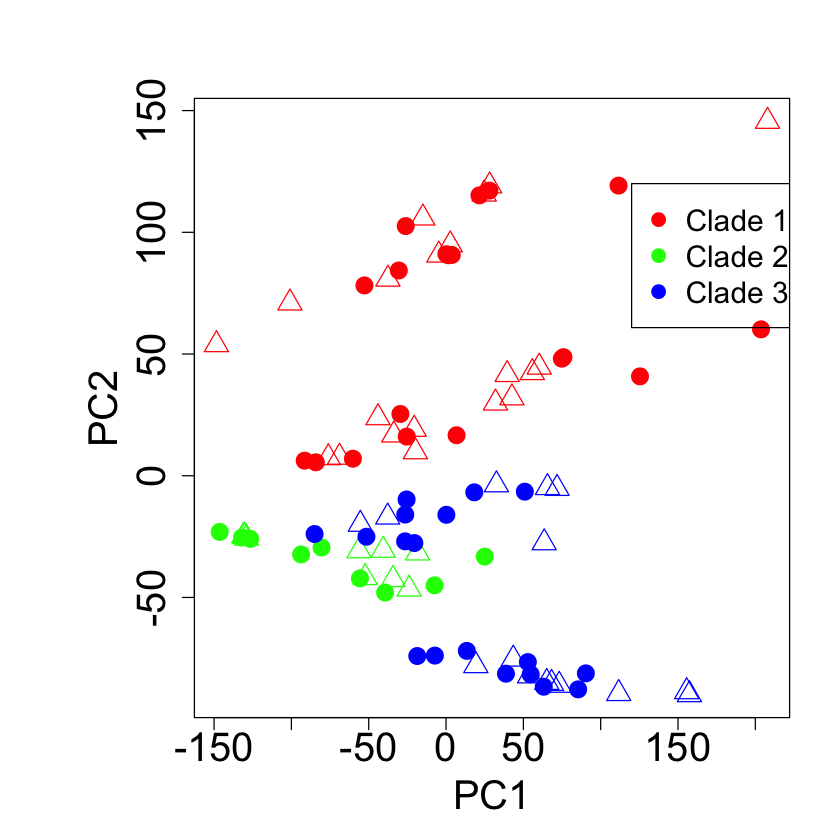

In [29]:
mar.default <- c(5,4,4,2) + 0.1
par(mar = mar.default + c(0, 4, 0, 0)) 
plot(pca$x[,1:2], 
     col=colours(fac), 
     #pch=19,
     pch = c(16, 2, 9)[as.numeric(as.factor(condition))],
     cex=2,
     xlab="PC1",
     ylab="PC2",
     cex.lab=2,
     cex.axis = 2)
legend(120,120,legend=c("Clade 1","Clade 2","Clade 3"),col=rainbow(length(unique(fac))),cex=1.5, pch=19)
legend(120,-115,legend=c("0.2 ppt","15 ppt"),cex=1.5,pch=c(16, 2, 9))

In [30]:
summary(pca)

Importance of components%s:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     74.1824 62.63941 60.77076 58.90970 57.49325 56.26736
Proportion of Variance  0.1145  0.08162  0.07683  0.07219  0.06876  0.06586
Cumulative Proportion   0.1145  0.19610  0.27293  0.34513  0.41389  0.47975
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     54.07846 51.44943 50.88078 49.57138 48.01316 46.70624
Proportion of Variance  0.06084  0.05507  0.05386  0.05112  0.04796  0.04538
Cumulative Proportion   0.54059  0.59566  0.64951  0.70063  0.74859  0.79397
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     43.83240 42.02350 38.55112 38.07254 33.39946 14.77608
Proportion of Variance  0.03997  0.03674  0.03092  0.03015  0.02321  0.00454
Cumulative Proportion   0.83394  0.87068  0.90159  0.93175  0.95495  0.95950
                          PC19     PC20    PC21   PC

In [32]:
# DESeq2 analysis

#rownames(counts) <- counts$GeneName 
#counts <- counts[-c(1)]
#counts <- counts[-c(1)]
#colnames(counts)

cols<-colnames(BW_FW_counts) 
#cols<-colnames(counts)
ExpDesign <- data.frame(row.names=cols, group = species_group,condition=condition)
ExpDesign

,group,condition
F_diaphanus_BW_1.quant,BW_Clade1_F_diaphanus,15_ppt
F_diaphanus_BW_2.quant,BW_Clade1_F_diaphanus,15_ppt
F_diaphanus_FW_2.quant,BW_Clade1_F_diaphanus,0.2_ppt
F_diaphanus_FW_3.quant,BW_Clade1_F_diaphanus,0.2_ppt
A_xenica_BW_1.quant,M_Clade3_A_xenica,15_ppt
A_xenica_BW_2.quant,M_Clade3_A_xenica,15_ppt
A_xenica_BW_3.quant,M_Clade3_A_xenica,15_ppt
A_xenica_FW_1.quant,M_Clade3_A_xenica,0.2_ppt
A_xenica_FW_2.quant,M_Clade3_A_xenica,0.2_ppt
A_xenica_FW_3.quant,M_Clade3_A_xenica,0.2_ppt


In [33]:
#all(rownames(ExpDesign) == colnames(counts))
all(rownames(ExpDesign) == colnames(BW_FW_counts))
counts_round <- round(BW_FW_counts,digits=0)
#counts_round<- round(counts,digits=0)
dds <- DESeqDataSetFromMatrix(countData = counts_round,colData = ExpDesign,design = ~ group + condition)

[1] TRUE

converting counts to integer mode


In [34]:
dds<-DESeq(dds,betaPrior=FALSE)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing


In [35]:
matrix(resultsNames(dds))

Intercept
group_BW_Clade2_F_parvapinis_vs_BW_Clade1_F_diaphanus
group_BW_Clade3_F_chrysotus_vs_BW_Clade1_F_diaphanus
group_FW_Clade1_F_catanatus_vs_BW_Clade1_F_diaphanus
group_FW_Clade1_F_rathbuni_vs_BW_Clade1_F_diaphanus
group_FW_Clade2_L_goodei_vs_BW_Clade1_F_diaphanus
group_FW_Clade3_F_notatus_vs_BW_Clade1_F_diaphanus
group_FW_Clade3_F_notti_vs_BW_Clade1_F_diaphanus
group_FW_Clade3_F_olivaceous_vs_BW_Clade1_F_diaphanus
group_FW_Clade3_F_sciadicus_vs_BW_Clade1_F_diaphanus
group_M_Clade1_F_grandis_vs_BW_Clade1_F_diaphanus


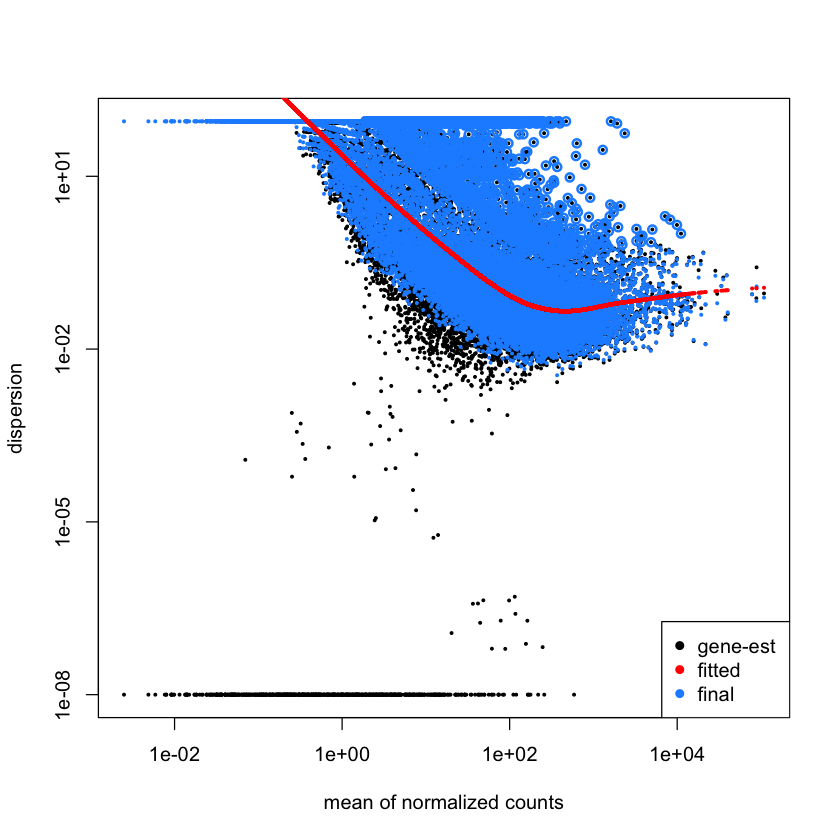

In [36]:
plotDispEsts(dds)

In [38]:
colData(dds)$physiology <- ph
colData(dds)$clade <- cl
colData(dds)$species <- sp
colData(dds)

DataFrame with 90 rows and 6 columns
                                         group condition        sizeFactor
                                      <factor>  <factor>         <numeric>
F_diaphanus_BW_1.quant   BW_Clade1_F_diaphanus    15_ppt 0.789969937383122
F_diaphanus_BW_2.quant   BW_Clade1_F_diaphanus    15_ppt  0.93935922136075
F_diaphanus_FW_2.quant   BW_Clade1_F_diaphanus   0.2_ppt 0.847088215907192
F_diaphanus_FW_3.quant   BW_Clade1_F_diaphanus   0.2_ppt  1.19761973682032
A_xenica_BW_1.quant          M_Clade3_A_xenica    15_ppt  1.84610490040659
...                                        ...       ...               ...
F_parvapinis_BW_2.quant BW_Clade2_F_parvapinis    15_ppt 0.655429972149484
F_parvapinis_BW_3.quant BW_Clade2_F_parvapinis    15_ppt 0.621369002173183
F_parvapinis_FW_1.quant BW_Clade2_F_parvapinis   0.2_ppt  0.56088763999134
F_parvapinis_FW_2.quant BW_Clade2_F_parvapinis   0.2_ppt 0.637677048870706
F_parvapinis_FW_3.quant BW_Clade2_F_parvapinis   0.2_ppt 0.6121

In [39]:
res <- results(dds, tidy=TRUE, contrast=c("condition", "15_ppt", "0.2_ppt")) %>% arrange(padj) %>% tbl_df()

In [40]:
head(res)

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
XP_012720215.1,1568.1861,1.3252374,0.09895331,13.39255,6.684314e-41,1.491738e-36
XP_012735775.1,805.5804,0.7521790,0.06135809,12.25884,1.506417e-34,1.680935e-30
XP_012716513.1,371.6827,0.9240229,0.08184980,11.28925,1.482955e-29,1.103170e-25
XP_012707310.1,522.5197,-11.1754806,1.02052843,-10.95068,6.595040e-28,3.679538e-24
XP_012724454.1,442.8489,-1.6820548,0.15453099,-10.88490,1.360441e-27,6.072194e-24
XP_012716807.1,3470.9142,-1.8059559,0.16853516,-10.71560,8.599477e-27,3.198576e-23


In [42]:
goi <-res$row[c(1:3)]
stopifnot(all(goi %in% names(dds)))
goi

[1] "XP_012720215.1" "XP_012735775.1" "XP_012716513.1"

In [44]:
ann<-counts[,c(2,3,4,5)]
colnames(ann)<-c("gene","scaffold","product","geneID")

In [45]:
tcounts <- t(log2((counts(dds[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>% 
  merge(colData(dds), ., by="row.names") %>% 
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))
tcounts_test <- merge(tcounts,ann,by="gene")
tcounts_test %>% select(Row.names, group, species, clade, 
                        physiology, condition, gene, product, 
                        scaffold,geneID, expression) %>% 
head %>% 
knitr::kable()



|Row.names           |group             |species  |clade  |physiology |condition |gene           |product                        |scaffold       |geneID       | expression|
|:-------------------|:-----------------|:--------|:------|:----------|:---------|:--------------|:------------------------------|:--------------|:------------|----------:|
|A_xenica_BW_1.quant |M_Clade3_A_xenica |A_xenica |Clade3 |M          |15_ppt    |XP_012716513.1 |B-cell lymphoma 6 protein-like |NW_012234254.1 |LOC105925293 |   8.829629|
|A_xenica_BW_2.quant |M_Clade3_A_xenica |A_xenica |Clade3 |M          |15_ppt    |XP_012716513.1 |B-cell lymphoma 6 protein-like |NW_012234254.1 |LOC105925293 |   8.376096|
|A_xenica_BW_3.quant |M_Clade3_A_xenica |A_xenica |Clade3 |M          |15_ppt    |XP_012716513.1 |B-cell lymphoma 6 protein-like |NW_012234254.1 |LOC105925293 |   8.991120|
|A_xenica_FW_1.quant |M_Clade3_A_xenica |A_xenica |Clade3 |M          |0.2_ppt   |XP_012716513.1 |B-cell lymphoma 6 protein-like |NW_

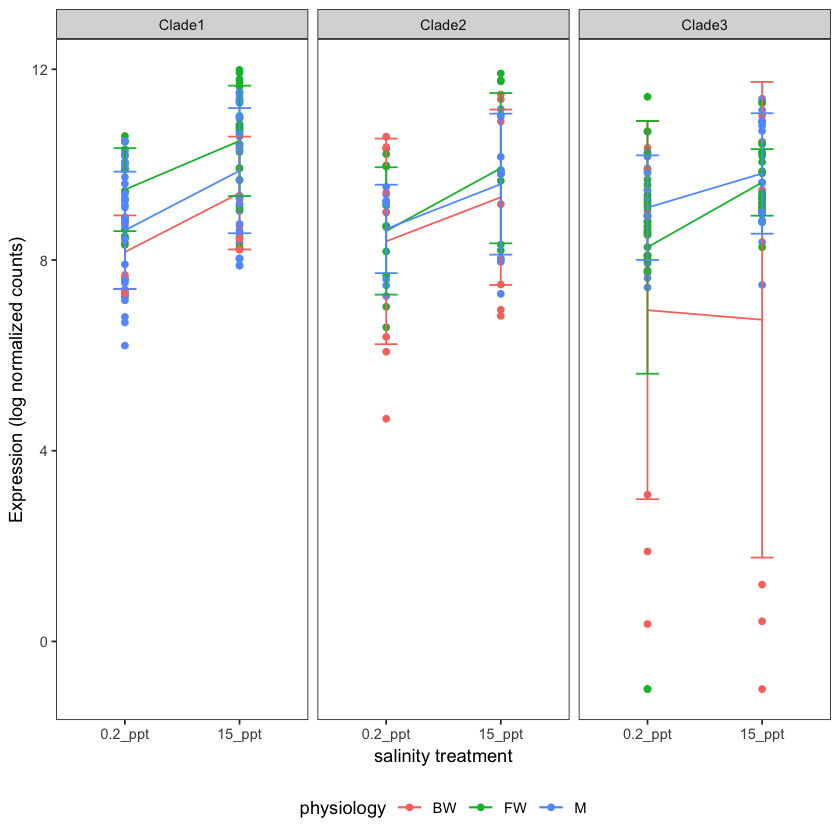

In [54]:
ggplot(tcounts_test, aes(condition, expression)) + 
  geom_point(aes(color=physiology)) +
  stat_summary(fun.y="mean", geom="line", aes(group=physiology,color=physiology)) +
  facet_grid(~clade,scales='free_y') +
  stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), 
               geom="errorbar", aes(color=physiology), width=0.2) +
  theme_bw() +
  theme(legend.position="bottom",panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
  labs(x="salinity treatment", 
       y="Expression (log normalized counts)")

In [55]:
pdf("~/Documents/UCDavis/Whitehead/RNAseq_15killifish/multi-ggplot2-catalog_salinity_31Oct2018.pdf")
for (i in goi) {
  p <- ggplot(filter(tcounts_test, gene==i), aes(condition, expression, fill=physiology)) +  geom_point(aes(color=physiology)) +
    stat_summary(fun.y="mean", geom="line", aes(group=physiology,color=physiology)) +
    facet_grid(~clade,scales='free_y') +
    stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), 
                 geom="errorbar", aes(color=physiology), width=0.2) +
    theme_bw() +
    theme(legend.position="bottom",panel.grid.major = element_blank(),panel.grid.minor = element_blank()) +
    labs(x="salinity treatment", 
         y="Expression (log normalized counts)")
  print(p)
}
dev.off()

pdf 
  2

In [48]:
res.1<-results(dds,contrast=c("condition","15_ppt","0.2_ppt"))
dim(res.1)

[1] 27775     6

In [51]:
res1_ordered <-as.data.frame(res.1[order(res.1$padj),])
id<-rownames(res1_ordered)

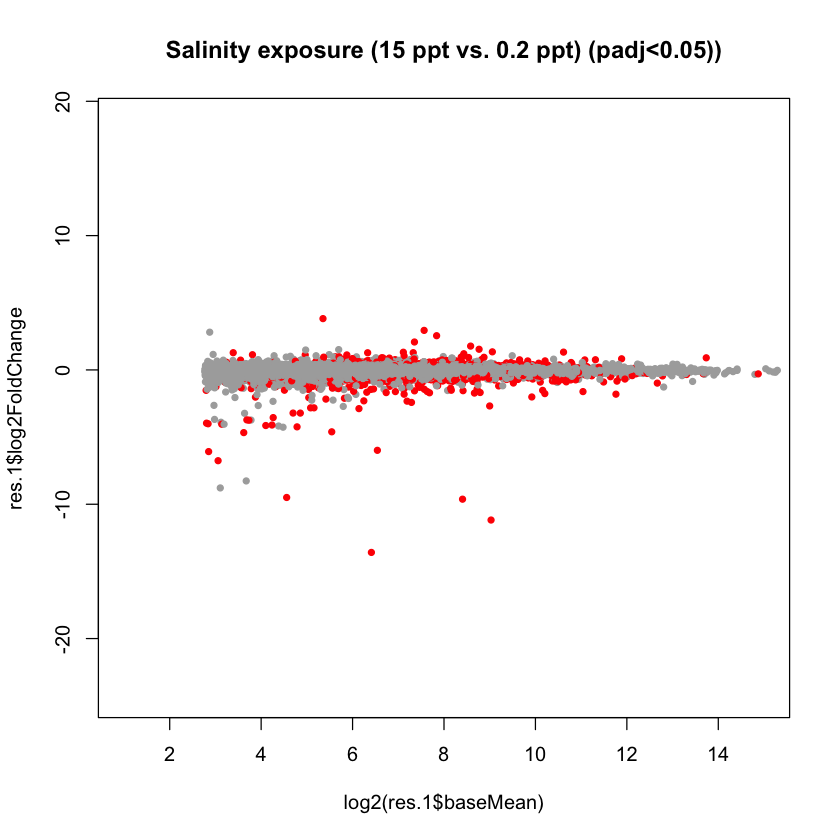

In [52]:
plot(log2(res.1$baseMean), res.1$log2FoldChange, 
     col=ifelse(res.1$padj < 0.05, "red","gray67"),
     main="Salinity exposure (15 ppt vs. 0.2 ppt) (padj<0.05))",xlim=c(1,15),pch=20,cex=1)